# Neural Network from Scratch

Our objective is to build a neural network for the classification of the MNIST dataset. This neural network will comprise of: an output layer with 10 nodes, a hidden layer of 128 nodes, and an input layer with 784 nodes corresponding to the image pixels. The specific structure of the neural network is outlined below, where $X$ represents the input, $A^{[0]}$ denotes the first layer, $Z^{[1]}$ signifies the unactivated layer 1, $A^{[1]}$ stands for the activated layer 1, and so forth. The weights and biases are represented by $W$ and $b$ respectively:

<div align="center">

$A^{[0]}=X$

$Z^{[1]}=W^{[1]}A^{[0]}+b^{[1]}$

$A^{[1]}=\text{ReLU}(Z^{[1]})$

$Z^{[2]}=W^{[2]}A^{[1]}+b^{[2]}$

$A^{[2]}=\text{softmax}(Z^{[2]})$

$Loss=\text{cross-entropy-loss}(A^{[2]})$
</div>

## Getting Started

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
mnist = tf.keras.datasets.mnist
import matplotlib.pyplot as plt

### Implementation of the activation function(ReLU) and softmax function

* ReLU will be used for the hidden layer , i.e., $A_1 = ReLU(Z_1)$<br>
$$ReLU(z) = \begin{cases}
z & \text{if } z>0\\
0 & \text{otherwise}
\end{cases}$$
* Softmax function will be used for the output layer for classification into 10 different neurons, each corresponding to a particular number between $1$ and $10$.<br>
  $A_2 = softmax(Z_2)$
$$softmax(z) = \frac{e^z}{\sum_{i=1}^{10} e^z}$$


In [19]:
def ReLU(Z):
    return np.where(Z>0, Z, 0)

def softmax(Z):
    exp_Z = np.exp(Z)
    return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

## Defining the NN class

Suppose that we have $m$ training datapoints. Also we have $i, h$ and $o$ number of neurons in input hidden and output layer respectively.

### Training
In the first step, we initialise weights and biases ($W_1, B_1, W_2, B_2$) arbitrarily. After that,
#### In each cycle of the Gradient Descent:
* We feed the training input ($X$) and using the values weights and biases at that moment, evaluate the values returned by neurons in all the three layers (so that they can be used to evaluate various derivatives). Mathematically, we evaluate $Z_1,A_1,Z_2$ and $A_2$ as follows
  - $X$ has dimensions $[m,i]$
  - $W_1$ has dimensions $[h,i]$
  - $B_1$ has dimensions $[1,h]$
  $$Z_1 = X W_1^T + B_1$$
  where B_1 will be broadcasted to $[m,h]$
  - $Z_1$ has dimensions $[m,h]$
  $$A_1 = f_1(Z_1) = ReLU(Z_1)$$
  - $A_1$ has dimensions $[m,h]$
  - $W_2$ has dimensions $[o,h]$
  - $B_2$ has dimensions $[1,o]$
  $$Z_2 = A_1 W_2^T + B_2$$
  where B_2 will be broadcasted to $[m,o]$
  - $Z_2$ has dimensions $[m,o]$
  $$A_2 = f_2(Z_2) = softmax(Z_2)$$
  - $A_2$ has dimensions $[m,o]$<br>
  #### <u>This process is called Forward Propagation</u>
<br><br>

* Next, we evaluate the derivatives of the cost function with respect to weights and biases ($W_1, B_1, W_2, B_2$).
  The videos [Backpropagation in NN](https://www.youtube.com/watch?v=URJ9pP1aURo&list=PLuhqtP7jdD8CftMk831qdE8BlIteSaNzD&index=5) and [Backpropagation for Softmax and Multi-Class Classification](https://www.youtube.com/watch?v=f-nW8cSa_Ec&list=PLuhqtP7jdD8CftMk831qdE8BlIteSaNzD&index=6) provide the derivation for these.
  <br>[Note: The notations and the convention used for dimensions may vary. The best way to resolve dimensional anomaly is to check the multipliability order of two matrices]<br>

  - #### Let's first define the Cost Function:
    + Loss function for the $i^{th}$ data-point amongst total $m$.
    $$Loss_i = -\sum_{k=0}^o Y[i,k] * ln(A_2[i,k])$$
    + The cost function is the average of Loss over all data-points
    $$L = Cost = \frac{1}{m} \sum_{i=0}^m Loss_i$$
  - $Y$ is the matrix after converting the original output array into a <b>one hot encoding</b> and has the dimensions $[m,o]$
  $$\frac{dL}{dZ_2} = dZ_2 = A_2 - Y$$
  - $dZ_2$ has dimensions $[m,o]$
  $$\frac{dL}{dW_2} = dW_2 = \frac{1}{m} dZ_2^T \, A_1$$
  - $dW_2$ has dimensions $[o,h]$
  $$\frac{dL}{dB_2} = dB_2 = \frac{1}{m} (\text{sum of rows of $dZ_2$})$$
  - $dB_2$ has dimensions $[1,o]$
  $$\frac{dL}{dZ_1} = dZ_1 = ( dZ_2 \,\, W_2 ) * f_1^{'}(Z_1)$$
  where $*$ denotes element-wise multiplication.
  - $dZ_1$ has dimensions $[m,h]$
  $$\frac{dL}{dW_1} = dW_1 = \frac{1}{m} dZ_1^T \, X$$
  - $dW_1$ has dimensions $[h,i]$
  $$\frac{dL}{dB_1} = dB_1 = \frac{1}{m} (\text{sum of rows of $dZ_1$})$$
  - $dB_1$ has dimensions $[1,h]$
  
  #### <u>This process is called Back Propagation</u>
  <br><br>

* Finally, for the cost to be minimized, we update the weights and biases. ($\alpha$ is the learning rate)
  $$W_2 = W_2 - dW_2 * \alpha$$
  $$B_2 = B_2 - dB_2 * \alpha$$
  $$W_1 = W_1 - dW_1 * \alpha$$
  $$B_1 = B_1 - dB_1 * \alpha$$
  #### <u>Updating the parameters</u>

In [20]:
class NN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        # initialized basic stats of NN
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.output_size=output_size
        self.learning_rate=learning_rate

        #initialized weights and biases
        self.W1=np.random.randn(hidden_size, input_size)*0.01
        self.B1= np.zeros((1,hidden_size))
        self.W2=np.random.randn(output_size, hidden_size)*0.01
        self.B2=np.zeros((1,output_size))

        #initialized activations and gradients
        self.AO=None
        self.Z1=None
        self.A1=None
        self.Z2=None
        self.A2=None
        self.dZ2=None
        self.dW2=None
        self.dB2=None
        self.dZ1=None
        self.dW1=None
        self.dB1=None

    # do the forward pass and evaluate the values of A0, Z1, A1, Z2, A2
    def forward_propagation(self, X):
        self.A0 = X
        self.Z1 = np.matmul(self.A0,self.W1.T) + self.B1
        self.A1 = ReLU(self.Z1)
        
        self.Z2 = np.matmul(self.A1,self.W2.T) + self.B2
        self.A2 = softmax(self.Z2)
        
    
    # convert the input y, into a one hot encoded array.
    '''
    one hot encoding is:
    you have an array with values [2, 5, 6] and you know the max value can be 8, then one hot encoded array will be:
    [[0,0,1,0,0,0,0,0,0], [0,0,0,0,0,1,0,0,0], [0,0,0,0,0,0,1,0,0]]
    Note that the index 2, 5, 6 have values 1 and all others have values 0
    '''
    def one_hot(self, y):
        temp = np.zeros((y.size, 10))
        for i in range(y.size):
            temp[i][y[i]] = 1
        return temp

    # calculate the derivative of the cost function with respect to W2, B2, W1, B1 in dW2, dB2, dW1, dB1 respectively
    def backward_propagation(self, X, y):
        m = X.shape[0]
        
        self.dZ2 = self.A2 - y
        self.dW2 = (1/m) * np.matmul(self.dZ2.T, self.A1)
        self.dB2 = (1/m) * np.sum(self.dZ2, axis=0, keepdims=True)
        self.dZ1 = (np.matmul(self.dZ2, self.W2)) * np.where(self.Z1>=0, 1, 0)
        self.dW1 = (1/m) * np.matmul(self.dZ1.T, X)
        self.dB1 = (1/m) * np.sum(self.dZ1, axis=0, keepdims=True)
    
    # update the parameters W1, W2, B1, B2
    def update_params(self):
        self.W2 = self.W2 - self.learning_rate * self.dW2
        self.B2 = self.B2 - self.learning_rate * self.dB2
        self.W1 = self.W1 - self.learning_rate * self.dW1
        self.B1 = self.B1 - self.learning_rate * self.dB1
    
    # get the predictions for the dataset
    def get_predictions(self,X):
        A0 = X
        Z1 = np.matmul(A0,self.W1.T) + self.B1
        A1 = ReLU(Z1)
        
        Z2 = np.matmul(A1,self.W2.T) + self.B2
        A2 = softmax(Z2)
        
        return np.argmax(A2, 1)
    
    # get the probability predictions for the dataset
    def get_prob_predictions(self,X):
        A0 = X
        Z1 = np.matmul(A0,self.W1.T) + self.B1
        A1 = ReLU(Z1)
        
        Z2 = np.matmul(A1,self.W2.T) + self.B2
        A2 = softmax(Z2)
        
        return A2

    # get the accuracy of the model on the dataset
    ## after the gradient descent has been run separately
    def get_accuracy(self, X, y):
        y_pred = self.get_predictions(X)
        accuracy = np.mean(y_pred == y) * 100
        return accuracy

    # run gradient descent on the model to get the values of the parameters
    def gradient_descent(self, X, y, iters=1000):
        Y = self.one_hot(y)
        for i in range(iters):
            self.forward_propagation(X)
            self.backward_propagation(X, Y)
            self.update_params()
            if i%(iters/10) == 0:
                print(f"The cost function after {i} iterations is {self.cross_entropy_loss(X,y)}")
        
    
    # evaluate cost using cross-entropy-loss formula.
    def cross_entropy_loss(self, X, y):
        Y = self.one_hot(y)
        y_pred = self.get_prob_predictions(X)
        return -np.mean(np.sum(Y * np.log(y_pred), axis=1))

    # Let me help a bit hehe :)
    def show_predictions(self, X, y, num_samples=10):
        random_indices = np.random.randint(0, X.shape[0], size=num_samples)

        for index in random_indices:
            sample_image = X[index, :].reshape((28, 28))
            plt.imshow(sample_image, cmap='gray')
            plt.title(f"Actual: {y[index]}, Predicted: {self.get_predictions(X[index])}")
            plt.show()

Now we are splitting the dataset into training and testing data

In [5]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

miu = np.mean(X_train, axis=(0, 1), keepdims=True)
stds = np.std(X_train, axis=(0, 1), keepdims=True)

mius = np.mean(X_test, axis=(0, 1), keepdims=True)
stdse = np.std(X_test, axis=(0, 1), keepdims=True)

X_normal_train = (X_train - miu) / (stds + 1e-7)
X_normal_test = (X_test - mius) / (stdse + 1e-7)

X_normal_train = X_normal_train.reshape((60000, -1))
X_normal_test = X_normal_test.reshape((10000, -1))

Now training the model on X_normal_train and Y_train dataset. The cost function is being monitored throughout to ensure that the model is running correctly.

In [21]:
# All the best :)
model = NN(input_size=784, hidden_size=128, output_size=10, learning_rate=0.5)
model.gradient_descent(X_normal_train, Y_train, iters=100)

The cost function after 0 iterations is 2.259106637027214
The cost function after 10 iterations is 0.8846781259261637
The cost function after 20 iterations is 0.5395091336322748
The cost function after 30 iterations is 0.3144537140521401
The cost function after 40 iterations is 0.2831925341855745
The cost function after 50 iterations is 0.25526150484823634
The cost function after 60 iterations is 0.2362453175422882
The cost function after 70 iterations is 0.2217329969741056
The cost function after 80 iterations is 0.2094266733741648
The cost function after 90 iterations is 0.19864215406707117


Accuracy of the model with given parameters

In [24]:
print(model.get_accuracy(X_normal_test, Y_test))

94.24


Predictions of our model vs actual values for few random data points

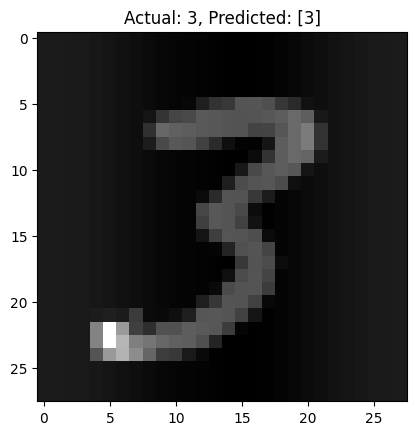

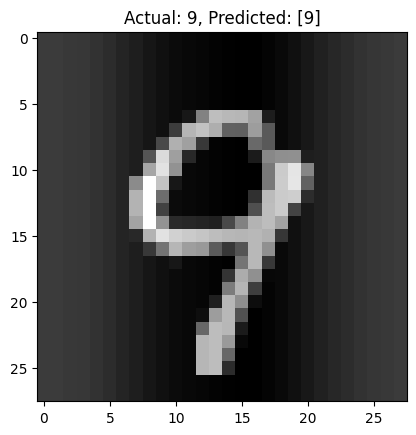

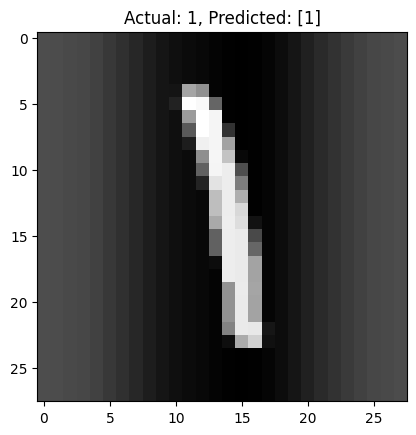

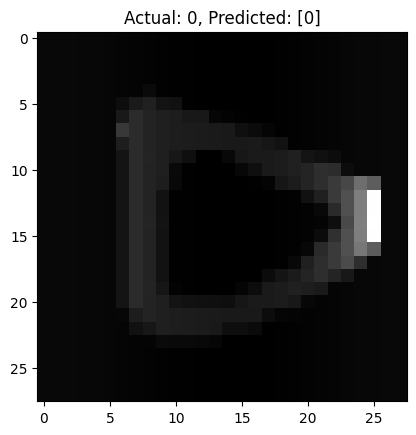

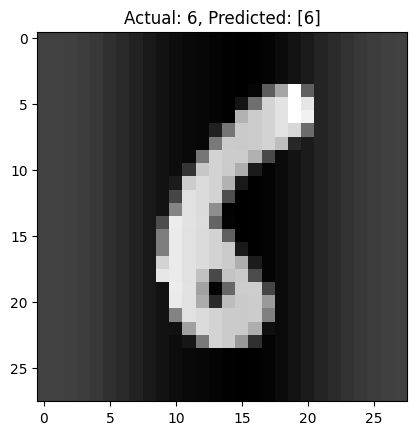

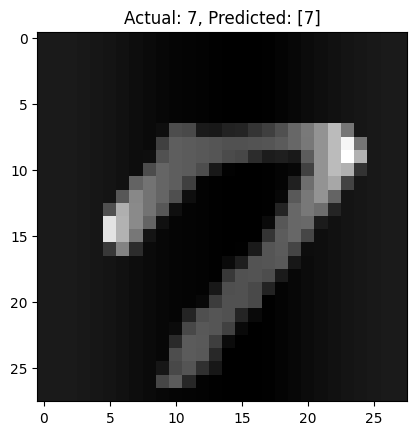

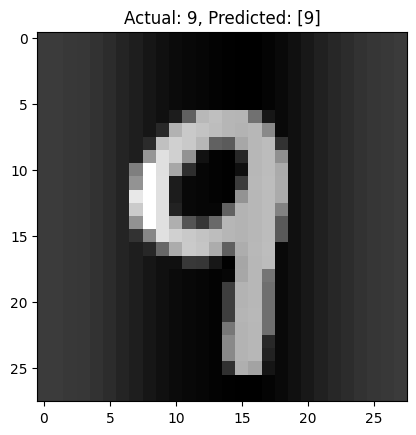

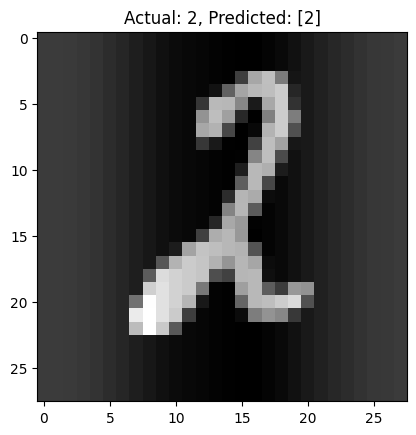

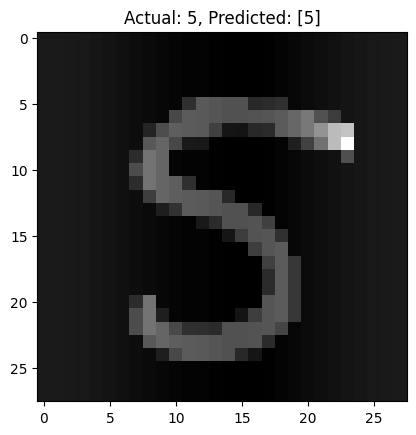

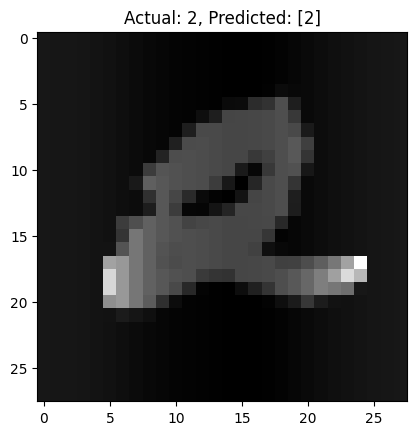

In [26]:
model.show_predictions(X=X_normal_test, y=Y_test)